In [1]:
import pandas as pd

# Load the entire dataset
df = pd.read_excel("/Users/salonibirthare/Desktop/Fall 2024/Text Mining/assignment 2/BookingDotCom_HotelReviews.xlsx")



/Users/salonibirthare/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df.shape

(515738, 12)

In [3]:
df.columns

Index(['Hotel_Name', 'Hotel_Address', 'Review_Count',
       'Non_Review_Scoring_Count', 'Average_Hotel_Score', 'Review_Date',
       'Reviewer_Nationality', 'Positive_Comments', 'Negative_Comments',
       'Total_Reviewer_Reviews', 'Reviewer_Score', 'Tags'],
      dtype='object')

In [4]:
df.head()

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Russia,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Ireland,No real complaints the hotel was great great ...,No Negative,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,Australia,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,United Kingdom,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-24,New Zealand,Amazing location and building Romantic setting,You When I booked with your company on line y...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


## Q1 What are the top five hotel features (e.g., location, staff, etc.) that customers mention the most in positive reviews and top five features they mention most in negative reviews? Your identified features must make sense (e.g., "great" or "negative" are not features). 

In [5]:
import pandas as pd
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

def extract_nouns_and_adjectives(text):
    if isinstance(text, str):  
        spDoc = nlp(text)
        # Extract nouns (NN) and adjectives (ADJ)
        features = [token.text for token in spDoc if token.pos_ in ['NOUN', 'ADJ'] and not token.is_stop and not token.is_punct]
        return features
    return []  

df['Nouns_Adjectives_Positive'] = df['Positive_Comments'].apply(extract_nouns_and_adjectives)
df['Nouns_Adjectives_Negative'] = df['Negative_Comments'].apply(extract_nouns_and_adjectives)

print(df[['Nouns_Adjectives_Positive', 'Nouns_Adjectives_Negative']].head())

                           Nouns_Adjectives_Positive  \
0                           [park, hotel, beautiful]   
1  [real, complaints, hotel, great, great, locati...   
2  [good, staff, ok, cute, hotel, breakfast, rang...   
3  [Great, location, nice, surroundings, bar, res...   
4             [Amazing, location, Romantic, setting]   

                           Nouns_Adjectives_Negative  
0  [angry, post, available, possible, sites, trip...  
1                                                 []  
2  [Rooms, nice, elderly, bit, difficult, rooms, ...  
3  [room, dirty, afraid, floor, weeks, White, fur...  
4  [company, line, pictures, room, room, staff, v...  


In [6]:
from collections import Counter
positive_features = [feature for sublist in df['Nouns_Adjectives_Positive'] for feature in sublist]
negative_features = [feature for sublist in df['Nouns_Adjectives_Negative'] for feature in sublist]

positive_feature_freq = Counter(positive_features)
negative_feature_freq = Counter(negative_features)

#top 5 features for both positive and negative reviews
top_positive_features = positive_feature_freq.most_common(5)
top_negative_features = negative_feature_freq.most_common(5)

print("Top 5 Features in Positive Reviews:")
print(top_positive_features)

print("\nTop 5 Features in Negative Reviews:")
print(top_negative_features)

Top 5 Features in Positive Reviews:
[('staff', 152875), ('location', 138042), ('room', 123026), ('hotel', 111604), ('good', 84618)]

Top 5 Features in Negative Reviews:
[('room', 154317), ('hotel', 68541), ('small', 45029), ('breakfast', 41469), ('staff', 32030)]


In [7]:
exclude_words = set(['good', 'great', 'bad', 'negative', 'positive', 'nice', 'poor', 'clean', 'dirty', 'comfortable', 'uncomfortable', 'helpful', 'hotel', 'rooms', 'bit', 'small', 't', 'night'])

filtered_positive_features = [feature for feature in positive_features if feature.lower() not in exclude_words]
filtered_negative_features = [feature for feature in negative_features if feature.lower() not in exclude_words]

filtered_positive_feature_freq = Counter(filtered_positive_features)
filtered_negative_feature_freq = Counter(filtered_negative_features)

top_filtered_positive_features = filtered_positive_feature_freq.most_common(5)
top_filtered_negative_features = filtered_negative_feature_freq.most_common(5)

print("\nTop 5 Filtered Features in Positive Reviews:")
print(top_filtered_positive_features)

print("\nTop 5 Filtered Features in Negative Reviews:")
print(top_filtered_negative_features)


Top 5 Filtered Features in Positive Reviews:
[('staff', 152875), ('location', 138042), ('room', 123026), ('friendly', 72332), ('breakfast', 63892)]

Top 5 Filtered Features in Negative Reviews:
[('room', 154317), ('breakfast', 41469), ('staff', 32030), ('bed', 25683), ('bathroom', 22087)]


In [9]:
from nltk import bigrams
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter, defaultdict

# Initialize necessary components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
exclude_words = set(['good', 'great', 'bad', 'negative', 'positive', 'nice', 'poor', 'clean', 
                     'dirty', 'comfortable', 'uncomfortable', 'helpful', 'hotel', 'bit', 'small', 
                     't', 'night'])

def extract_and_count_bigrams(comments):
    bigram_counts = defaultdict(int)
    for text in comments:
        if isinstance(text, str):
            # Tokenize, lemmatize, and filter tokens
            tokens = [lemmatizer.lemmatize(token.lower()) for token in nltk.word_tokenize(text)
                      if token.lower() not in stop_words and token.lower() not in exclude_words]
            # Count unique bigrams
            for bigram in bigrams(tokens):
                sorted_bigram = tuple(sorted(bigram))  # Normalize bigrams
                bigram_counts[sorted_bigram] += 1
    return bigram_counts

# Apply the function to positive and negative comments
positive_bigram_freq = extract_and_count_bigrams(df['Positive_Comments'])
negative_bigram_freq = extract_and_count_bigrams(df['Negative_Comments'])

# Get the top 5 bigrams for both positive and negative reviews
top_positive_bigrams = sorted(positive_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:5]
top_negative_bigrams = sorted(negative_bigram_freq.items(), key=lambda x: x[1], reverse=True)[:5]

# Print results
print("\nTop 5 Unique Bigrams in Positive Reviews:")
for bigram, freq in top_positive_bigrams:
    print(f"{bigram}: {freq}")

print("\nTop 5 Unique Bigrams in Negative Reviews:")
for bigram, freq in top_negative_bigrams:
    print(f"{bigram}: {freq}")



Top 5 Unique Bigrams in Positive Reviews:
('friendly', 'staff'): 60075
('excellent', 'location'): 20413
('location', 'staff'): 18218
('bed', 'comfy'): 14386
('location', 'perfect'): 13441

Top 5 Unique Bigrams in Negative Reviews:
('room', 'service'): 6938
('air', 'conditioning'): 5540
('coffee', 'tea'): 4980
('booking', 'com'): 4639
('4', 'star'): 4570


## Q2 What are the top five features that customers prefer most if they are a solo traveler vs traveling with a group vs on a business trip vs a leisure trip vs traveling as a couple vs a family with young children. You will find these categories in the "Tags" column. There are a few more tags that we don't need.

First Approach: Uses Counter to extract and rank the top positive and negative features based on their frequency across different travel categories.

In [51]:
from collections import Counter

exclude_words = ['rooms', 'good', 'hotel', 'staff', 'small', 'friendly', 'helpful', 'nice', 'bit', 't', 'great']

def extract_travel_category(tags):
    tags = eval(tags)  
    relevant_categories = [
        'Solo traveler', 'Group', 'Business trip', 'Leisure trip', 
        'Couple', 'Family with young children'
    ]
    
    for tag in tags:
        tag = tag.strip()  
        if tag in relevant_categories:
            return tag
    return None 

filtered_df = df[df['Tags'].apply(lambda x: extract_travel_category(x) is not None)].copy()

features_by_category = {}
relevant_categories = ['Solo traveler', 'Group', 'Business trip', 'Leisure trip', 'Couple', 'Family with young children']

for category in relevant_categories:
    
    category_df = filtered_df[filtered_df['Tags'].apply(lambda x: extract_travel_category(x) == category)]
    
    
    positive_features = [feature for sublist in category_df['Nouns_Adjectives_Positive'] for feature in sublist if feature not in exclude_words]
    positive_feature_freq = Counter(positive_features)
    
    
    negative_features = [feature for sublist in category_df['Nouns_Adjectives_Negative'] for feature in sublist if feature not in exclude_words]
    negative_feature_freq = Counter(negative_features)
    
    features_by_category[category] = {
        'Top_Positive_Features': positive_feature_freq.most_common(5),
        'Top_Negative_Features': negative_feature_freq.most_common(5)
    }

for category, features in features_by_category.items():
    print(f"\nTop 5 Features for {category}:")
    print("Positive Features:", features['Top_Positive_Features'])
    print("Negative Features:", features['Top_Negative_Features'])



Top 5 Features for Solo traveler:
Positive Features: [('room', 1047), ('location', 863), ('clean', 455), ('breakfast', 447), ('comfortable', 422)]
Negative Features: [('room', 1510), ('breakfast', 308), ('night', 226), ('bathroom', 220), ('bed', 219)]

Top 5 Features for Group:
Positive Features: [('room', 312), ('location', 307), ('clean', 166), ('breakfast', 159), ('comfortable', 135)]
Negative Features: [('room', 433), ('breakfast', 121), ('bed', 79), ('night', 64), ('bathroom', 61)]

Top 5 Features for Business trip:
Positive Features: [('location', 19628), ('room', 16919), ('breakfast', 9352), ('clean', 7287), ('comfortable', 7112)]
Negative Features: [('room', 26893), ('breakfast', 6671), ('night', 4041), ('bed', 3858), ('bathroom', 3459)]

Top 5 Features for Leisure trip:
Positive Features: [('location', 115461), ('room', 102753), ('breakfast', 52948), ('clean', 45793), ('comfortable', 44737)]
Negative Features: [('room', 122569), ('breakfast', 33616), ('bed', 20995), ('night',

Second Approach: Applies TF-IDF Vectorizer to compute feature importance and determine the top features for each category based on their TF-IDF scores.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

filtered_df['All_Features'] = filtered_df['Nouns_Adjectives_Positive'] + filtered_df['Nouns_Adjectives_Negative']


documents_by_category = {}
for category in relevant_categories:
    category_df = filtered_df[filtered_df['Tags'].apply(lambda x: extract_travel_category(x) == category)]
    documents_by_category[category] = ' '.join([' '.join(features) for features in category_df['All_Features']])


tfidf_vectorizer = TfidfVectorizer(stop_words=exclude_words, max_features=100)  
tfidf_matrix = tfidf_vectorizer.fit_transform(documents_by_category.values())


tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=documents_by_category.keys(), columns=tfidf_vectorizer.get_feature_names_out())


top_features_by_category = {}
for category in relevant_categories:
   
    top_features = tfidf_df.loc[category].sort_values(ascending=False).head(5)
    top_features_by_category[category] = top_features

for category, features in top_features_by_category.items():
    print(f"\nTop 5 Features for {category}:")
    print(features)



Top 5 Features for Solo traveler:
room         0.769503
location     0.310072
breakfast    0.221272
clean        0.179638
bed          0.175271
Name: Solo traveler, dtype: float64

Top 5 Features for Group:
room         0.716854
location     0.350441
breakfast    0.265884
clean        0.201057
bed          0.168174
Name: Group, dtype: float64

Top 5 Features for Business trip:
room         0.735156
location     0.376495
breakfast    0.262626
bed          0.162914
clean        0.160436
Name: Business trip, dtype: float64

Top 5 Features for Leisure trip:
room         0.695533
location     0.393362
breakfast    0.261406
bed          0.181578
clean        0.173008
Name: Leisure trip, dtype: float64

Top 5 Features for Couple:
room           0.751416
location       0.289142
breakfast      0.250177
bed            0.211654
comfortable    0.158519
Name: Couple, dtype: float64

Top 5 Features for Family with young children:
room         0.728695
location     0.351178
breakfast    0.273417
cle

## Q3 What are the top five features customers like most and top five features they complain about most about hotels in United Kingdom, France, Italy, and Spain? Country information is available inside Hotel_Address. (2 points)

In [91]:
from collections import Counter
import pandas as pd

non_informative_features = {
    'good', 'bad', 'hotel', 'bit', 'great', 'excellent', 'negative', 'positive',
                            'small', 'big', 'nice', 'average', 'poor', 'room', 'rooms', 'staff', 'service', 
                            'friendly', 'time', 'clean', 'day', 't', 'little', 'helpful', 'night', 'lovely', 'perfect'}

def extract_country(address):
    if "United Kingdom" in address:
        return "United Kingdom"
    elif "France" in address:
        return "France"
    elif "Italy" in address:
        return "Italy"
    elif "Spain" in address:
        return "Spain"
    return None

def is_informative(feature):
    return feature.lower() not in non_informative_features

df['Country'] = df['Hotel_Address'].apply(extract_country)
filtered_df = df[df['Country'].isin(['United Kingdom', 'France', 'Italy', 'Spain'])]

for country in filtered_df['Country'].unique():
    country_reviews = filtered_df[filtered_df['Country'] == country]

    positive_features = [feature for sublist in country_reviews['Nouns_Adjectives_Positive']
                         for feature in sublist if is_informative(feature)]
    negative_features = [feature for sublist in country_reviews['Nouns_Adjectives_Negative']
                         for feature in sublist if is_informative(feature)]

    positive_top = [feature for feature, _ in Counter(positive_features).most_common(5)]
    negative_top = [feature for feature, _ in Counter(negative_features).most_common(5)]

    print(f"Top 5 Positive Features for Hotels in {country}: {positive_top}")
    print(f"Top 5 Negative Features for Hotels in {country}: {negative_top}")

Top 5 Positive Features for Hotels in United Kingdom: ['location', 'breakfast', 'comfortable', 'bed', 'station']
Top 5 Negative Features for Hotels in United Kingdom: ['breakfast', 'bed', 'bathroom', 'bar', 'shower']
Top 5 Positive Features for Hotels in France: ['location', 'comfortable', 'breakfast', 'bed', 'station']
Top 5 Negative Features for Hotels in France: ['breakfast', 'bathroom', 'bed', 'shower', 'expensive']
Top 5 Positive Features for Hotels in Spain: ['location', 'breakfast', 'comfortable', 'bed', 'pool']
Top 5 Negative Features for Hotels in Spain: ['breakfast', 'pool', 'bed', 'bathroom', 'bar']
Top 5 Positive Features for Hotels in Italy: ['location', 'breakfast', 'station', 'comfortable', 'bed']
Top 5 Negative Features for Hotels in Italy: ['breakfast', 'bathroom', 'bed', 'shower', 'reception']


## Q4 Create a dashboard with the following plots; (1) "Top Five Hotels Overall" with consistently high ratings, (2) Bottom Five Hotels Overall" with consistently low ratings, (3) Five Most Improved Hotels" with the highest improvement in average ratings from 2015 to 2017, showing their average ratings for each of the three years.

# Alternate Plots

In the event that the Dash dashboard does not run as expected, the following alternate plots provide a visual representation of hotel ratings data.

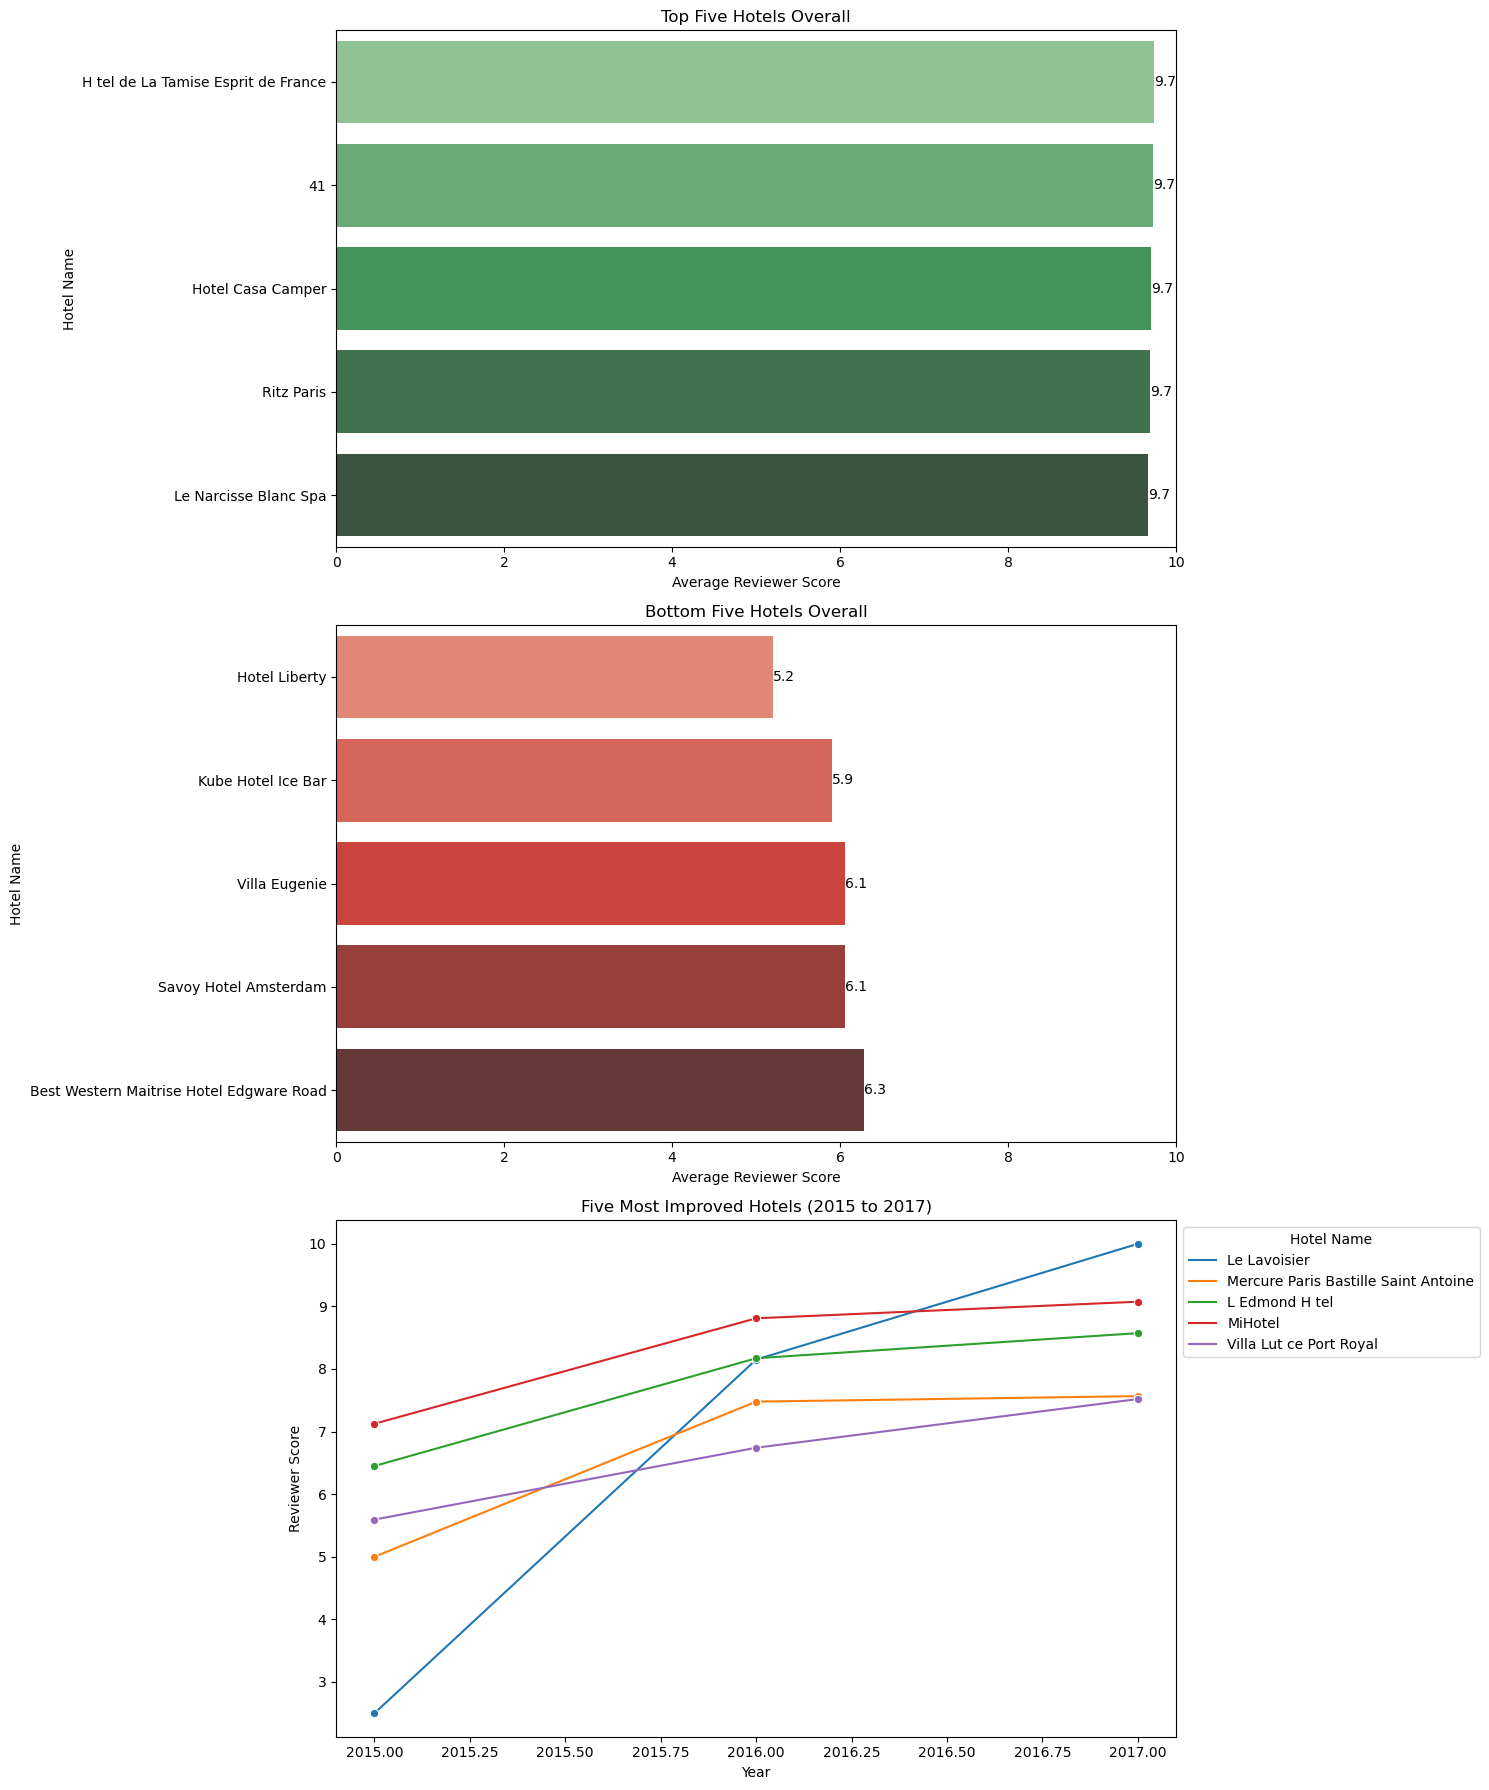

In [125]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Review_Date'] = pd.to_datetime(df['Review_Date'])

df['Review_Year'] = df['Review_Date'].dt.year

avg_ratings = df.groupby(['Hotel_Name', 'Review_Year'])['Reviewer_Score'].mean().unstack()

avg_ratings['Overall_Avg_Score'] = avg_ratings.mean(axis=1)
top_hotels = avg_ratings.nlargest(5, 'Overall_Avg_Score').reset_index()
bottom_hotels = avg_ratings.nsmallest(5, 'Overall_Avg_Score').reset_index()

avg_ratings['Improvement'] = avg_ratings[2017] - avg_ratings[2015]
most_improved_hotels = avg_ratings.nlargest(5, 'Improvement').reset_index()

plt.figure(figsize=(15, 18))

plt.subplot(3, 1, 1)
top_barplot = sns.barplot(x=top_hotels['Overall_Avg_Score'], y=top_hotels['Hotel_Name'], palette='Greens_d')
plt.title("Top Five Hotels Overall")
plt.xlabel("Average Reviewer Score")
plt.ylabel("Hotel Name")
plt.xlim(0, 10)  

for index, value in enumerate(top_hotels['Overall_Avg_Score']):
    top_barplot.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.subplot(3, 1, 2)
bottom_barplot = sns.barplot(x=bottom_hotels['Overall_Avg_Score'], y=bottom_hotels['Hotel_Name'], palette='Reds_d')
plt.title("Bottom Five Hotels Overall")
plt.xlabel("Average Reviewer Score")
plt.ylabel("Hotel Name")
plt.xlim(0, 10) 

for index, value in enumerate(bottom_hotels['Overall_Avg_Score']):
    bottom_barplot.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')


plt.subplot(3, 1, 3)
most_improved_hotels_melted = most_improved_hotels.melt(id_vars='Hotel_Name', 
                                                         value_vars=[2015, 2016, 2017], 
                                                         var_name='Year', 
                                                         value_name='Reviewer_Score')

sns.lineplot(data=most_improved_hotels_melted, x='Year', y='Reviewer_Score', hue='Hotel_Name', marker='o', palette='tab10')
plt.title("Five Most Improved Hotels (2015 to 2017)")
plt.xlabel("Year")
plt.ylabel("Reviewer Score")
plt.legend(title="Hotel Name", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  
plt.show()  

This analysis identifies key hotel features in Booking.com reviews, highlighting top features customers mention in both positive and negative reviews. Preferences differ by traveler types (solo, group, business, leisure, couple, family), with solo travelers favoring convenience and families preferring child-friendly amenities. Regional analysis of reviews from the UK, France, Italy, and Spain revealed country-specific hotel experiences. The dashboard visualizes the top and bottom five hotels overall and the most improved from 2015 to 2017, offering insights for improving hotel services based on customer feedback.